In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
mpl.style.use('ggplot')
warnings.simplefilter('ignore')
%matplotlib inline

In [4]:
import pandas_profiling

In [5]:
hr = pd.read_csv('employee_data.csv')
hr.head(2)
df = hr.copy()

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


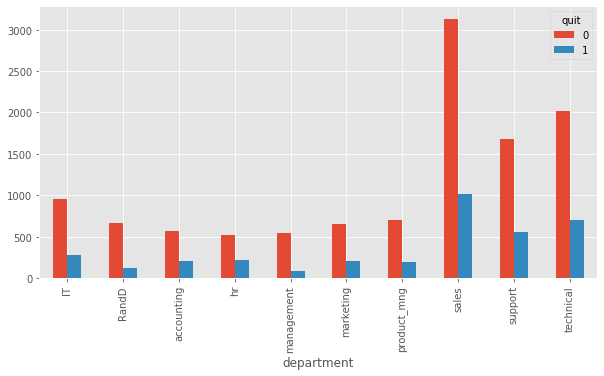

In [8]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar', figsize=(10,5))

In [9]:
pd.__version__

'1.0.3'

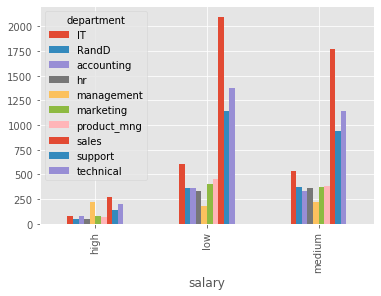

In [10]:
pd.crosstab(hr.salary, hr.department).plot(kind='bar')

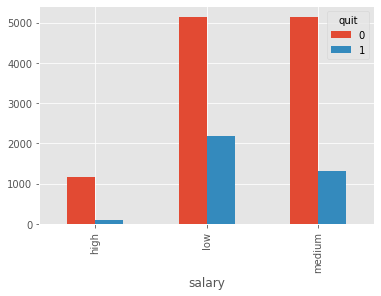

In [11]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')

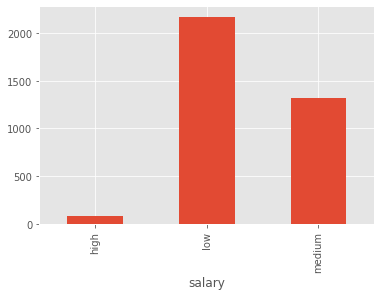

In [12]:
pd.crosstab(hr.quit,hr.salary).iloc[1].plot(kind='bar')

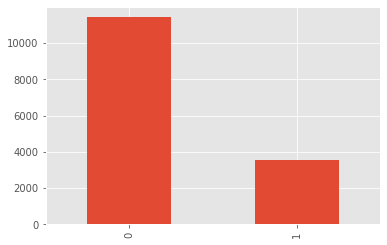

In [13]:
hr['quit'].value_counts().plot(kind='bar')

In [14]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
#changing categorical values 
dep = pd.get_dummies(hr.department, prefix='department')
dep.head()

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [16]:
hr = hr.join(dep)

In [17]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [18]:
sal = pd.get_dummies(df.salary, prefix='Salary')
sal.head()

,Salary_high,Salary_low,Salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [19]:
hr = hr.join(sal)

In [20]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [21]:
hr.drop(columns=['salary', 'department'], inplace=True)

In [22]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'Salary_high',
       'Salary_low', 'Salary_medium'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = hr.loc[:, hr.columns != 'quit' ]
print(x.head())
y = hr.loc[:, ['quit']]
y.head()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  department_IT  \
0                   3              0                      0              0   
1                   6              0                      0              0   
2                   4              0                      0              0   
3                   5              0                      0              0   
4                   3              0                      0              0   

   department_RandD  department_accounting  depart

,quit
0,1
1,1
2,1
3,1
4,1


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [26]:
print('shape of train', x_train.shape, ' ', y_train.shape)
print('sape of test ', x_test.shape, ' ', y_test.shape)

shape of train (11999, 20)   (11999, 1)
sape of test  (3000, 20)   (3000, 1)


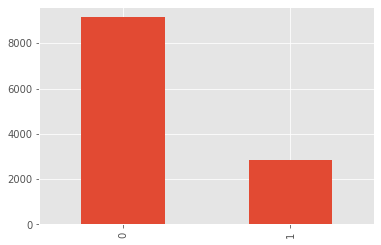

In [27]:
y_train['quit'].value_counts().plot(kind='bar')

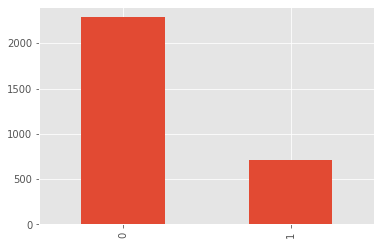

In [28]:
y_test['quit'].value_counts().plot(kind='bar')

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
import matplotlib.image as mpimg


In [31]:
@interact
def plot_tree(crit=['gini', 'entropy'],
             split=['best', 'random'],
             depth=IntSlider(min=1, max=50, value=2, continuous_update=False),
             min_split=IntSlider(min=2, max=5, value=2, continuous_update=False),
             min_leaf=IntSlider(min=1, max=5, value=1, continuous_udpate=False)):
    
    estimator = DecisionTreeClassifier(criterion=crit,
                                       splitter=split,
                                       max_depth=depth, 
                                       min_samples_split=min_split, 
                                       min_samples_leaf=min_leaf,
                                      random_state=0)
    estimator.fit(x_train, y_train)
    
    print('The Accuracy Score of Train Data is {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))
    print('The Accuracy Score of Test Data is {:.3f}'.format(accuracy_score(y_test, estimator.predict(x_test))))
    
    
    graph = Source(tree.export_graphviz(estimator, 
                                        out_file=None, 
                                        feature_names=x_train.columns, 
                                        class_names=['Stayed', 'Quit'], 
                                        filled=True))
    
    display(Image(data=graph.pipe(format='png'))) 

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…